In [41]:
        ## Classifier with a pretrained CNN for feature extraction from "Deep Learning with Python" ##


# coding: utf-8

# #### Instantiating the VGG16 convolutional base

# In[3]:


from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False,  # Because you intend to use your own densely connected classifier, 
                                      # you don’t need to include it.
                  input_shape=(150, 150, 3)) #if you don’t pass it, the network will be able to process inputs of any size
conv_base.summary()


# #### Extracting features using the pretrained convolutional base

# In[4]:


import os
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

base_dir = './dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=sample_count)
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary', shuffle=False)
    i = 0
    for inputs_batch, labels_batch in generator:
                features_batch = conv_base.predict(inputs_batch)
                features[i * batch_size : (i + 1) * batch_size] = features_batch
                labels[i * batch_size : (i + 1) * batch_size] = labels_batch
                i += 1
                if i * batch_size >= sample_count:
                    break
    return features, labels

train_features, train_labels = extract_features(train_dir, 215)#264)
validation_features, validation_labels = extract_features(validation_dir, 108)#132)
test_features, test_labels = extract_features(test_dir, 106)#132)

# In[5]:


train_features = np.reshape(train_features, (215, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (108, 4 * 4 * 512))
test_features = np.reshape(test_features, (106, 4 * 4 * 512))


# In[8]:
from keras import models
from keras import layers
from keras import optimizers


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))
test_loss, test_acc = model.evaluate(test_features, test_labels)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [42]:
for (x, y) in zip(test_features, test_labels):    
    output = model.predict(x.reshape(1,-1))
    print('\tdesejado: %d\tcalculado: %d'%(y, output[0][0]>0.5))

	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 0	calculado: 1
	desejado: 0	calculado: 0
	desejado: 0	calculado: 0
	desejado: 1	calculado: 1
	desejado: 1

In [43]:
output = model.predict(test_features)
b_index = [print(ind) for ind, t, y in zip(range(106), test_labels, np.round(output)) if t != y]
print('error: %d of %d (%1.4f)'%(len(b_index), len(test_labels), len(b_index)/len(test_labels)))

2
5
7
8
11
14
17
19
23
34
77
82
84
86
87
93
102
error: 17 of 106 (0.1604)


8192


TypeError: Invalid dimensions for image data

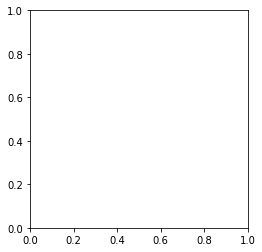

In [44]:
import matplotlib.pyplot as plt
print(len(test_features[0]))
plt.imshow(test_features[0])
plt.show()

In [ ]:
# In[9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend(['Training acc','Validation acc'],loc = 4)
fig = plt.gcf()
plt.show()
fig.savefig('acc.png', format='png')


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend()
fig = plt.gcf()
plt.show()
fig.savefig('loss.png', format='png')

print("--- accuracy mean ---")
print("train:"+str(np.mean(acc)))
print("validation:"+str(np.mean(val_acc)))
print()
print("test accuracy: "+str(test_acc))
